<h1><center>
    4th and Onwards!
</center></h1>
<h2><center>
    A full analysis of 4th downs in today's NFL -- By Alex Ackler
</center></h2>

It's a cold January evening somewhere in America. You're watching your favorite NFL team in a playoff game, tied at 20 with the clock slowly ticking. The other team has the ball, but their drive has stalled at midfield. "*Iiiiit's 4th dooowwwwwn!*", cries a familiar voice from above the stadium. They're going for it. Even from the TV, you know that the roar of the crowd is deafening. Their quarterback tries to tune out the noise, the pressure of the moment. Could it all come down to this *one play...?*

I've been a fan for as long as I can remember, and 4th down attempts might just be my favorite moments in all of sports. The risk is massive, but the rewards are so enticing that many teams just can't resist. Many legends have been born, many memories made, hearts broken and coaches fired, on the infamous 4th down conversion attempt.

Of course, this means coaches are usually okay with just punting it.

In this statistical analysis, I want to explore the decision-making of 2021 NFL teams on 4th down, and see what circumstances warrant a team's decision on that particular down: When it's best to go for it, kick a field goal, or just punt it away.

### BACKGROUND INFO: Rules and Terms

For a full explanation of the rules of NFL football, [here](https://www.liveabout.com/football-101-the-basics-of-football-1333784) is an article that goes into detail. For this analysis, however, we only need to understand certain aspects of the game, so I'm going to explain those briefly here.

For our purposes, we only care about *drives* in football. A **drive** is when one team is on offense, trying to push the ball as far as they can down the field. The other team is on defense, trying to stop them. The offense can make it all the way to the other team's end zone for a **touchdown** (worth anywhere from 6-8 points), or come up short but still go far enough to kick a **field goal** (worth 3 points).

The offense has 4 chances, or **downs**, to make this happen. Obviously, the 100 yard football field is a long way to go with just 4 plays- so, to help the offense out, if they move the ball just 10 yards from where they started the drive, they get a **first down**. Now, they have 4 more plays to make it the next 10 yards, for the next first down. This goes on until they score, or they commit a **turnover**- giving the ball up to the other team.

So now, it's hopefully clear why 4th down is so important. For the offense, it's their last chance to make something happen on the drive. For the defense, it's their chance to make a big stop and get some rest off the field.

### BACKGROUND INFO:  Choices on 4th down

The defense's goal is simple: stop the offense. On offense, all teams generally make one of 3 decisions on 4th down:

1. **FIELD GOAL:** Try and kick the field goal for 3 points. If you make the field goal, you **kickoff** the ball to the other team (which usually starts their drive about 25 yards down the field.) If you miss it, they get the ball right where you left it.
2. **GO FOR IT:** Try and get to the first down marker or the end zone. If you make it, you get a first down (or a touchdown!) But if you don't, the other team gets the ball right where you left it, known as a **turnover on downs.**
3. **PUNT:** Have a player essentially drop kick the ball as far as they can down the field. Wherever the other team gets it is where they'll start their drive. NFL Punters can usually punt the ball about 50-60 yards.

So as we can see, scoring points aren't the only thing that matters on 4th down. *Positioning* is also crucial.

For example, if you go for it at your own 1 yard line and fail, you've given your opponent the ball at the 1- an easy chance for them to score a touchdown. Even if you make the first down, you'll still have a long way to go before you get any points. So in this case, punting is your best option. You won't score points, but at least you'll push your opponent farther back, and give your defense a better chance to make a stop. 0 points is better than -6, after all.

This was an example of an obvious choice, but things can get very hazy in actual games. What if you're not deep in your own territory, but instead at midfield? What if it's 4th down at your *opponent's* 1 yard line- do you really settle for the field goal, when you're so close to the touchdown? How does the score, time on the clock, and general situation of the game impact your decision?

This is exactly the kind of question I hope to answer with my analysis.

### Data Scraping

Let's start with getting our data. We will be using https://www.pro-football-reference.com/, a lovely website that has stats on everything imaginable in the NFL.

We also use numpy and pandas, two pretty standard libraries for data analysis in Python, requests and bs4 for obtaining/parsing the data from pro football reference.com, and a few other libraries that could be handy.

In [587]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup, Comment
import re
import datetime

Pro Football Reference is a well-structured website that has a seperate URL for every game ever played and recorded. So in short, we will need to get to each URL of each game in the 2021 season, get the play-by-play table of those games, and find fourth down statistics we're interested in.

Here is an example of how we can process the play-by-play table of a game. This was a week 13 game between the Philadelphia Eagles and New York Jets.

Tips for how to scrape this website, which wrote its HTML slightly differently, were found here: https://stackoverflow.com/questions/55198103/scraping-difficult-table

It also should be noted that I am only using Pro Football Reference's database for personal use in an education-related project, which does not violate their terms of use.

In [975]:
def get_4th_downs(url_gen):
    #first we need to extract the table. It's confusing. Follow the link above if you don't
    #fully understand what's happening.
    temp = requests.get(url_gen, stream = True)
    root = BeautifulSoup(temp.content, "html.parser")

    #we need to bypass the "comments" of the html table.
    placeholder_gen = root.select_one('#all_pbp .placeholder')
    comment = next(elem for elem in placeholder_gen.next_siblings if isinstance(elem, Comment))
    table = BeautifulSoup(comment, 'html.parser')

    tab = pd.read_html(str(table))
    playbyplay_this = tab[0]
    playbyplay_this = playbyplay_this.drop(['EPB', 'EPA'], axis = 1)

    #once we have the full play-by-play, we only care about 4th downs.
    playbyplay_this = playbyplay_this[playbyplay_this['Down'] == "4"]
    playbyplay_this = playbyplay_this.reset_index(drop=True)
    
    return playbyplay_this

#substitute the url for any game you like on pro-football-reference.com
playbyplay_4ths = get_4th_downs("https://www.pro-football-reference.com/boxscores/202112050nyj.htm")
pd.options.display.max_rows = 20
display(playbyplay_4ths)

,Quarter,Time,Down,ToGo,Location,Detail,PHI,NYJ
0,2,9:26,4,1,PHI 1,Zach Wilson pass complete to Ryan Griffin for ...,14,18
1,2,2:24,4,13,NYJ 22,"Braden Mann punts 45 yards, recovered by Jalen...",21,18
2,2,0:22,4,11,NYJ 13,Jake Elliott 31 yard field goal good,24,18
3,3,7:05,4,14,NYJ 14,Jake Elliott 32 yard field goal good,27,18
4,3,5:39,4,8,NYJ 33,Braden Mann punts 33 yards downed by Daniel Brown,27,18
5,3,2:52,4,4,NYJ 48,"Penalty on C.J. Mosley: Encroachment, 5 yards ...",27,18
6,3,1:24,4,2,NYJ 34,Gardner Minshew up the middle for no gain (tac...,27,18
7,4,14:18,4,4,NYJ 25,Jake Elliott 43 yard field goal good,30,18
8,4,9:48,4,5,NYJ 28,Jake Elliott 46 yard field goal good,33,18
9,4,5:29,4,10,PHI 37,Zach Wilson pass incomplete intended for Ty Jo...,33,18


It's here we notice a big problem. The table doesn't tell us what team is on offense! We could keep track of turnovers and kickoffs, but that would be long and painful. Instead, we can use another table present at the URL for each game: the drives table. (Recall a drive is whenever a team's offense possesses the ball.) This table tells us when each team started each of their drives. There's a drives table for both teams at every URL.

It will be particularly useful to us if we can combine the two tables into one, so we can see exactly when each team had the ball.

In [976]:
def get_drives(url_gen, play_sheet):
    
    #similar to above, first extract the table from this difficult HTML code.
    temp = requests.get(url_gen, stream = True)
    root = BeautifulSoup(temp.content, "html.parser")
    root.prettify()

    #the names of the two teams are stored in these columns, we'll use them later.
    throwaway = play_sheet.columns.values
    visitor_name = throwaway[6]
    home_name = throwaway[7]

    #make a table for each drives table (one per team)
    placeholder1 = root.select_one('#all_vis_drives .placeholder')
    comment = next(elem for elem in placeholder1.next_siblings if isinstance(elem, Comment))
    table1 = BeautifulSoup(comment, 'html.parser')

    placeholder2 = root.select_one('#all_home_drives .placeholder')
    comment = next(elem for elem in placeholder2.next_siblings if isinstance(elem, Comment))
    table2 = BeautifulSoup(comment, 'html.parser')

    #read in the tables, add a "team" column so we know which team has the ball.
    tab1 = pd.read_html(str(table1))
    visitor_drives = tab1[0]
    visitor_drives['Team'] = visitor_name

    tab2 = pd.read_html(str(table2))
    home_drives = tab2[0]
    home_drives['Team'] = home_name

    #lastly, combine the tables into one, to be sorted later.
    all_drives = visitor_drives.append(home_drives, ignore_index = True)
    all_drives = all_drives.drop(all_drives.columns[0], axis = 1)
    return all_drives

all_drives = get_drives("https://www.pro-football-reference.com/boxscores/202112050nyj.htm", playbyplay_4ths)
all_drives

,Quarter,Time,LOS,Plays,Length,Net Yds,Result,Team
0,1,12:42,PHI 25,6,3:17,75,Touchdown,PHI
1,1,3:18,PHI 31,8,4:06,69,Touchdown,PHI
2,2,9:22,PHI 6,8,4:52,94,Touchdown,PHI
3,2,2:10,NYJ 47,10,1:51,34,Field Goal,PHI
4,3,15:00,PHI 16,14,8:22,70,Field Goal,PHI
5,3,5:28,PHI 34,13,6:13,41,Field Goal,PHI
6,4,13:02,PHI 24,6,3:20,48,Field Goal,PHI
7,4,5:23,PHI 37,7,3:35,6,Punt,PHI
8,1,15:00,PHI 21,5,2:18,21,Touchdown,NYJ
9,1,9:25,NYJ 32,11,6:07,68,Touchdown,NYJ


With this, we have all the data we need. The next step is to put it in a more usable form.

### Data Tidying

If we can sort the above drive table based on "Quarter" and "Time", we could have the full time table we desire. But to make things a little easier, we'll create a new field, "Total Time" that tells us how much time in total is left on the game clock. 15:00 in the 1st quarter is actually 60 minutes total, for example.

In [979]:
def get_total_time(quarters, times):
    new_times = []
    new_quarts = []
    
    #for each row, get quarter and time fields
    for i in range(0, len(quarters)):
        clock = times[i]
        quart = quarters[i]
        colon = clock.index(':')
        #split time fields into minutes and seconds
        minute = int(clock[0:colon])
        second = int(clock[colon+1:len(clock)])
    
        #converts to full game clock time
        #Overtime is a special case that we won't dive too deep into,
        #Just set the total time to the quarter time.
        if quart == "OT" or quart == "5" or quart == 5:
            quart = 5
            minute = minute
            second = second

        else:
            minute = minute + ((4 - int(quart)) * 15)
            if minute > 59:
                minute = 59
                second = 59

            elif minute < 0:
                minute = 0
                second = 0

        newval = datetime.time(minute = minute, second = second)
        #notice we return both the quarter and our new Total Time field.
        #This is so we can set "OT" for overtime to "5" to make that column numeric.
        new_quarts.append(quart)
        new_times.append(newval)
    
    return [new_times, new_quarts]

Let's use this function and do some sorting to get the drives in a nice, timely order. In the end, we have to sort on both Quarter and Total Time anyway, since overtime is a challenging special case to handle. Total Time is still useful, however, since it is a "datetime" object we can easily sort.

In [980]:
pd.set_option('display.max_rows', 200)
#add total time column and sort by it
def fix1(any_table):
    #any_table['Quarter'] = pd.to_numeric(any_table['Quarter'])
    new_times = get_total_time(any_table['Quarter'], any_table['Time'])

    any_table2 = any_table
    any_table2['Total Time'] = new_times[0]
    any_table2['Quarter'] = new_times[1]
    any_table['Quarter'] = pd.to_numeric(any_table['Quarter'])
    
    any_table2 = any_table2.sort_values(['Quarter', 'Total Time'], ascending = (True, False))
    any_table2 = any_table2.reset_index(drop = True)
    return any_table2

all_drives = fix1(all_drives)
all_drives

,Quarter,Time,LOS,Plays,Length,Net Yds,Result,Team,Total Time
0,1,15:00,PHI 21,5,2:18,21,Touchdown,NYJ,00:59:59
1,1,12:42,PHI 25,6,3:17,75,Touchdown,PHI,00:57:42
2,1,9:25,NYJ 32,11,6:07,68,Touchdown,NYJ,00:54:25
3,1,3:18,PHI 31,8,4:06,69,Touchdown,PHI,00:48:18
4,2,14:12,NYJ 25,9,4:50,75,Touchdown,NYJ,00:44:12
5,2,9:22,PHI 6,8,4:52,94,Touchdown,PHI,00:39:22
6,2,4:30,NYJ 25,3,2:20,-3,Punt,NYJ,00:34:30
7,2,2:10,NYJ 47,10,1:51,34,Field Goal,PHI,00:32:10
8,2,0:19,NYJ 25,1,0:19,-1,End of Half,NYJ,00:30:19
9,3,15:00,PHI 16,14,8:22,70,Field Goal,PHI,00:30:00


I would use the above method again for the 4th downs table, but we don't need to sort what's already sorted, so the code is shorter here.

In [981]:
new_times = get_total_time(playbyplay_4ths['Quarter'], playbyplay_4ths['Time'])
playbyplay_4ths['Total Time'] = new_times[0]
playbyplay_4ths['Quarter'] = new_times[1]
playbyplay_4ths['Quarter'] = pd.to_numeric(playbyplay_4ths['Quarter'])
playbyplay_4ths

,Quarter,Time,Down,ToGo,Location,Detail,PHI,NYJ,Total Time
0,2,9:26,4,1,PHI 1,Zach Wilson pass complete to Ryan Griffin for ...,14,18,00:39:26
1,2,2:24,4,13,NYJ 22,"Braden Mann punts 45 yards, recovered by Jalen...",21,18,00:32:24
2,2,0:22,4,11,NYJ 13,Jake Elliott 31 yard field goal good,24,18,00:30:22
3,3,7:05,4,14,NYJ 14,Jake Elliott 32 yard field goal good,27,18,00:22:05
4,3,5:39,4,8,NYJ 33,Braden Mann punts 33 yards downed by Daniel Brown,27,18,00:20:39
5,3,2:52,4,4,NYJ 48,"Penalty on C.J. Mosley: Encroachment, 5 yards ...",27,18,00:17:52
6,3,1:24,4,2,NYJ 34,Gardner Minshew up the middle for no gain (tac...,27,18,00:16:24
7,4,14:18,4,4,NYJ 25,Jake Elliott 43 yard field goal good,30,18,00:14:18
8,4,9:48,4,5,NYJ 28,Jake Elliott 46 yard field goal good,33,18,00:09:48
9,4,5:29,4,10,PHI 37,Zach Wilson pass incomplete intended for Ty Jo...,33,18,00:05:29


Now that we have Total Time on both tables, we're ready to combine them. Note that "Total Time" represents the time the drive started in the drives table, and the time the play happened in the 4th downs table.

Process: For each 4th down, look at the drives table. Find drives whose "total time" field (representing when the drive started) comes BEFORE this play. We know that the last drive starting before this play must be the drive the play happened in. Carry over the relevant fields from the drive table to make one big table!

In [982]:
pd.set_option('display.max_rows', 200)

def match_drives_with_plays(drive_table, play_sheet):
    #starts at 0, doesn't need to reset since we go thru it once.
    drive = 0
    drive_num = []
    teams = []
    results = []
    total_plays_in_drive = []
    
    ot_drive = 0
    alt_drive_table = drive_table[drive_table['Quarter'] == 5]
    alt_drive_table = alt_drive_table.reset_index(drop = True)
    
    ot_numdrives = len(alt_drive_table['Total Time']) - 1
    numdrives = len(drive_table['Total Time']) - ot_numdrives - 2
    
    #for every 4th down play...
    for index, row in play_sheet.iterrows():
        time = play_sheet.at[index, 'Total Time']
        
        if play_sheet.at[index, 'Quarter'] == 5:
            while ot_drive < ot_numdrives + 1 and alt_drive_table.at[ot_drive, 'Total Time'] > time:
                ot_drive = ot_drive + 1
            #print("ended on drive: " + str(drive) + " and ot drive: " + str(ot_drive))
            index_of = drive + ot_drive - 1
        else:
            #for every drive...try to match the play with the drive
            while drive < numdrives + 1 and drive_table.at[drive, 'Total Time'] > time:
                drive = drive + 1

            index_of = drive - 1
            #print("matched play #" + str(index) + " with drive #" + str(index_of))
        
        #extract data
        drive_num.append(index_of)
        teams.append(drive_table.at[index_of, 'Team'])
        results.append(drive_table.at[index_of, 'Result'])
        total_plays_in_drive.append(drive_table.at[index_of, 'Plays'])

    #we are ready to add new columns to the table.
    new_plays = play_sheet
    new_plays['Drive #'] = drive_num
    new_plays['Team'] = teams
    new_plays['Drive Result'] = results
    new_plays['# of Plays'] = total_plays_in_drive
    return new_plays

match_drives_with_plays(all_drives, playbyplay_4ths)

,Quarter,Time,Down,ToGo,Location,Detail,PHI,NYJ,Total Time,Drive #,Team,Drive Result,# of Plays
0,2,9:26,4,1,PHI 1,Zach Wilson pass complete to Ryan Griffin for ...,14,18,00:39:26,4,NYJ,Touchdown,9
1,2,2:24,4,13,NYJ 22,"Braden Mann punts 45 yards, recovered by Jalen...",21,18,00:32:24,6,NYJ,Punt,3
2,2,0:22,4,11,NYJ 13,Jake Elliott 31 yard field goal good,24,18,00:30:22,7,PHI,Field Goal,10
3,3,7:05,4,14,NYJ 14,Jake Elliott 32 yard field goal good,27,18,00:22:05,9,PHI,Field Goal,14
4,3,5:39,4,8,NYJ 33,Braden Mann punts 33 yards downed by Daniel Brown,27,18,00:20:39,10,NYJ,Punt,3
5,3,2:52,4,4,NYJ 48,"Penalty on C.J. Mosley: Encroachment, 5 yards ...",27,18,00:17:52,11,PHI,Field Goal,13
6,3,1:24,4,2,NYJ 34,Gardner Minshew up the middle for no gain (tac...,27,18,00:16:24,11,PHI,Field Goal,13
7,4,14:18,4,4,NYJ 25,Jake Elliott 43 yard field goal good,30,18,00:14:18,11,PHI,Field Goal,13
8,4,9:48,4,5,NYJ 28,Jake Elliott 46 yard field goal good,33,18,00:09:48,13,PHI,Field Goal,6
9,4,5:29,4,10,PHI 37,Zach Wilson pass incomplete intended for Ty Jo...,33,18,00:05:29,14,NYJ,Downs,11


Just two more improvements to make now. First, the "location" field can be improved by simplifying it with how many yards are left to go to the endzone. "NYJ 20", for example, means 80 yards to go for the Jets and only 20 for the Eagles.

In [983]:
def update_locations(play_sheet):
    new_locs = []
    for i in range(0, len(play_sheet['Location'])):

        #which team has the ball?
        team = play_sheet.at[i, 'Team']
        #split on space. first part is which half of the field we're on.
        #the second part is how many yards to go to the closest endzone.
        loc = play_sheet.at[i, 'Location'].split(' ')
        half = loc[0]

        #inside "your own half", you have to get to midfield plus another 50 yards.
        if team == half:
            new_locs.append((50 - int(loc[1])) + 50)
        #on the other half, you just have to get to the endzone.
        else:
            new_locs.append(int(loc[1]))

    new_sheet = play_sheet
    new_sheet['To EndZone'] = new_locs
    new_sheet = new_sheet.drop(['Location'], axis = 1)
    return new_sheet
    
playbyplay_4ths = update_locations(playbyplay_4ths)
playbyplay_4ths

,Quarter,Time,Down,ToGo,Detail,PHI,NYJ,Total Time,Drive #,Team,Drive Result,# of Plays,To EndZone
0,2,9:26,4,1,Zach Wilson pass complete to Ryan Griffin for ...,14,18,00:39:26,4,NYJ,Touchdown,9,1
1,2,2:24,4,13,"Braden Mann punts 45 yards, recovered by Jalen...",21,18,00:32:24,6,NYJ,Punt,3,78
2,2,0:22,4,11,Jake Elliott 31 yard field goal good,24,18,00:30:22,7,PHI,Field Goal,10,13
3,3,7:05,4,14,Jake Elliott 32 yard field goal good,27,18,00:22:05,9,PHI,Field Goal,14,14
4,3,5:39,4,8,Braden Mann punts 33 yards downed by Daniel Brown,27,18,00:20:39,10,NYJ,Punt,3,67
5,3,2:52,4,4,"Penalty on C.J. Mosley: Encroachment, 5 yards ...",27,18,00:17:52,11,PHI,Field Goal,13,48
6,3,1:24,4,2,Gardner Minshew up the middle for no gain (tac...,27,18,00:16:24,11,PHI,Field Goal,13,34
7,4,14:18,4,4,Jake Elliott 43 yard field goal good,30,18,00:14:18,11,PHI,Field Goal,13,25
8,4,9:48,4,5,Jake Elliott 46 yard field goal good,33,18,00:09:48,13,PHI,Field Goal,6,28
9,4,5:29,4,10,Zach Wilson pass incomplete intended for Ty Jo...,33,18,00:05:29,14,NYJ,Downs,11,37


Finally, We can simplify the score columns to one column to show how much the team that has the ball is up or down by. -3, for example, indicates a team is down by 3.

In [984]:
def update_scores(play_sheet):
    new_scores = []
    for i in range(0, len(play_sheet['Team'])):
        team = play_sheet.at[i, 'Team']
    
        #get names of the teams like before
        throwaway = play_sheet.columns.values
        vis_name = throwaway[5]
        hom_name = throwaway[6]
        
        #score calculation
        vis_points = int(play_sheet.at[i, vis_name])
        hom_points = int(play_sheet.at[i, hom_name])
        if team == vis_name:
            new_scores.append(vis_points - hom_points)
        else:
            new_scores.append(hom_points - vis_points)
    new_sheet = play_sheet
    new_sheet = new_sheet.drop([vis_name, hom_name], axis = 1)
    new_sheet['Score'] = new_scores
    return new_sheet
        
playbyplay_4ths_final = update_scores(playbyplay_4ths)
playbyplay_4ths_final

,Quarter,Time,Down,ToGo,Detail,Total Time,Drive #,Team,Drive Result,# of Plays,To EndZone,Score
0,2,9:26,4,1,Zach Wilson pass complete to Ryan Griffin for ...,00:39:26,4,NYJ,Touchdown,9,1,4
1,2,2:24,4,13,"Braden Mann punts 45 yards, recovered by Jalen...",00:32:24,6,NYJ,Punt,3,78,-3
2,2,0:22,4,11,Jake Elliott 31 yard field goal good,00:30:22,7,PHI,Field Goal,10,13,6
3,3,7:05,4,14,Jake Elliott 32 yard field goal good,00:22:05,9,PHI,Field Goal,14,14,9
4,3,5:39,4,8,Braden Mann punts 33 yards downed by Daniel Brown,00:20:39,10,NYJ,Punt,3,67,-9
5,3,2:52,4,4,"Penalty on C.J. Mosley: Encroachment, 5 yards ...",00:17:52,11,PHI,Field Goal,13,48,9
6,3,1:24,4,2,Gardner Minshew up the middle for no gain (tac...,00:16:24,11,PHI,Field Goal,13,34,9
7,4,14:18,4,4,Jake Elliott 43 yard field goal good,00:14:18,11,PHI,Field Goal,13,25,12
8,4,9:48,4,5,Jake Elliott 46 yard field goal good,00:09:48,13,PHI,Field Goal,6,28,15
9,4,5:29,4,10,Zach Wilson pass incomplete intended for Ty Jo...,00:05:29,14,NYJ,Downs,11,37,-15


Great! Now we have to do that...for every game of the 2021 NFL season.

Every NFL game is stored under its own URL owned by pro football reference, involving an identifier with the date the game was played and the code of the home team. We are going to need to know how each team is encoded in the Pro Football Reference website. It was a bit painful to type this out, but I hope it will be worth it.

In [858]:
team_names = ['Philadelphia Eagles', 'Dallas Cowboys', 'Washington Football Team', 'New York Giants',
             'Detroit Lions', 'Green Bay Packers', 'Minnesota Vikings', 'Chicago Bears',
             'Carolina Panthers', 'Tampa Bay Buccaneers', 'New Orleans Saints', 'Atlanta Falcons',
             'Seattle Seahawks', 'Arizona Cardinals', 'Los Angeles Rams', 'San Francisco 49ers',
             'New England Patriots', 'Miami Dolphins', 'Buffalo Bills', 'New York Jets', 
             'Pittsburgh Steelers', 'Baltimore Ravens', 'Cleveland Browns', 'Cincinnati Bengals',
             'Jacksonville Jaguars', 'Indianapolis Colts', 'Tennessee Titans', 'Houston Texans',
             'Kansas City Chiefs', 'Denver Broncos', 'Las Vegas Raiders', 'Los Angeles Chargers']


team_codes = ['phi', 'dal', 'was', 'nyg', 'det', 'gnb', 'min', 'chi', 'car', 'tam', 'nor', 'atl',
             'sea', 'crd', 'ram', 'sfo', 'nwe', 'mia', 'buf', 'nyj', 'pit', 'rav', 'cle', 'cin',
             'jax', 'clt', 'oti', 'htx', 'kan', 'den', 'rai', 'sdg']

Now let's find those URL's. The way each URL is structured is that it always has the same header and footer, and then the aforementioned middle identifier. We need to know the date of every NFL game in 2021.

To do this, we access another webpage on Pro Football Reference, this one a full schedule of the 2021 NFL season. The code below gets us this table in the format of a Pandas dataframe. It's a little untidy, but we only care about the date of each game and who the home team was.

In [985]:
r = requests.get("https://www.pro-football-reference.com/years/2021/games.htm")
root = BeautifulSoup(r.content, "html.parser")
root.prettify()

item = root.find(id="div_games")
tab = pd.read_html(str(item))
schedule_raw = tab[0]

schedule = schedule_raw[schedule_raw['Week'] != "Week"]
display(schedule)

,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Unnamed: 7,PtsW,PtsL,YdsW,TOW,YdsL,TOL
0,1,Thu,2021-09-09,8:20PM,Tampa Bay Buccaneers,NaN,Dallas Cowboys,boxscore,31,29,431,4,451,1
1,1,Sun,2021-09-12,1:00PM,Philadelphia Eagles,@,Atlanta Falcons,boxscore,32,6,434,0,260,0
2,1,Sun,2021-09-12,1:00PM,San Francisco 49ers,@,Detroit Lions,boxscore,41,33,442,2,430,1
3,1,Sun,2021-09-12,1:00PM,Carolina Panthers,NaN,New York Jets,boxscore,19,14,381,1,252,1
4,1,Sun,2021-09-12,1:00PM,Houston Texans,NaN,Jacksonville Jaguars,boxscore,37,21,449,0,395,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,18,Sun,2022-01-09,1:00PM,New England Patriots,@,Miami Dolphins,preview,NaN,NaN,NaN,NaN,NaN,NaN
285,18,Sun,2022-01-09,4:25PM,San Francisco 49ers,@,Los Angeles Rams,preview,NaN,NaN,NaN,NaN,NaN,NaN
286,18,Sun,2022-01-09,4:25PM,Seattle Seahawks,@,Arizona Cardinals,preview,NaN,NaN,NaN,NaN,NaN,NaN
287,18,Sun,2022-01-09,4:25PM,Kansas City Chiefs,@,Denver Broncos,preview,NaN,NaN,NaN,NaN,NaN,NaN


At last we can finally get the URL's. The format of each URL is:

header + DATE + HOME TEAM + footer

We handle the header and footer below in the next cell, first we have to extract the date (in format yyyymmdd0) and the home team's code.

In [986]:
abbrs = []

#change to this to get all the data available through Week 14 of the NFL season:
#schedule14 = schedule[:208]

# --->  CHANGE ME!  <----
#...if you want to
schedule14 = schedule[:80]

for index, row in schedule14.iterrows():
    winner = schedule14.at[index, 'Winner/tie']
    loser = schedule14.at[index, 'Loser/tie']

    #winner is always listed first, so '@' would indicate the home team lost.
    if schedule14.at[index, 'Unnamed: 5'] == "@":
        indy2 = team_names.index(loser)
        
    #likewise, the home team won if they are listed first.
    else:
        indy2 = team_names.index(winner)
        
    #match the team's name to their code in the table defined above
    abbreviation = team_codes[indy2]
    
    abbrs.append(schedule14.at[index, 'Date'].replace('-','') + '0' + abbreviation)
    
#abbrs

The final step in data extraction is to visit every URL we've identified, get all the 4th downs played in each game (and the data associated with them), and aggregate them into a gigantic table.

NOTE: This step could take several minutes to run! If it is taking too long, please reduce the sample size at the "CHANGE ME" point in the cell above.

In [987]:
def get_full_table(url):
    #CALL ALL METHODS HERE
    temp_table = get_4th_downs(url)
    drives_table = get_drives(url, temp_table)
    drives_table = fix1(drives_table)
    
    new_times = get_total_time(temp_table['Quarter'], temp_table['Time'])
    temp_table['Total Time'] = new_times[0]
    temp_table['Quarter'] = new_times[1]
    temp_table['Quarter'] = pd.to_numeric(temp_table['Quarter'])
    #temp_table
    
    #DRIVES
    big_table = match_drives_with_plays(drives_table, temp_table)
    #LOCATIONS
    big_table = update_locations(big_table)
    #SCORES
    big_table = update_scores(big_table)
    
    return big_table

In [988]:
pd.options.display.max_rows = 15

start = "https://www.pro-football-reference.com/boxscores/"
end = ".htm"

all_4th_downs = pd.DataFrame()
i = 0

for link in abbrs:
    url = start + link + end

    #just to be safe, but all these links should work.
    try:
        #call all the methods we've built to get our fully usable table
        game_table = get_full_table(url)
        
        #keep track of what game this happened on as well
        game_table['Game ID'] = i
        
        all_4th_downs = all_4th_downs.append(game_table, ignore_index = True)
        
        print(url)
        i = i + 1
    except requests.exceptions.RequestException:
        print("passed on a link: " + str(link))
        #pass
    
display(all_4th_downs)

https://www.pro-football-reference.com/boxscores/202109090tam.htm
https://www.pro-football-reference.com/boxscores/202109120atl.htm
https://www.pro-football-reference.com/boxscores/202109120det.htm
https://www.pro-football-reference.com/boxscores/202109120car.htm
https://www.pro-football-reference.com/boxscores/202109120htx.htm
https://www.pro-football-reference.com/boxscores/202109120cin.htm
https://www.pro-football-reference.com/boxscores/202109120oti.htm
https://www.pro-football-reference.com/boxscores/202109120was.htm
https://www.pro-football-reference.com/boxscores/202109120buf.htm
https://www.pro-football-reference.com/boxscores/202109120clt.htm
https://www.pro-football-reference.com/boxscores/202109120nor.htm
https://www.pro-football-reference.com/boxscores/202109120nwe.htm
https://www.pro-football-reference.com/boxscores/202109120kan.htm
https://www.pro-football-reference.com/boxscores/202109120nyg.htm
https://www.pro-football-reference.com/boxscores/202109120ram.htm
https://ww

,Quarter,Time,Down,ToGo,Detail,Total Time,Drive #,Team,Drive Result,# of Plays,To EndZone,Score,Game ID
0,1,13:26,4,2,Bradley Pinion punts 65 yards out of bounds,00:58:26,0,TAM,Punt,3,67,0,0
1,1,9:42,4,15,Bryan Anger punts 38 yards out of bounds,00:54:42,1,DAL,Punt,9,44,0,0
2,2,15:00,4,5,Bradley Pinion punts downed by Jaydon Mickens....,00:45:00,4,TAM,Punt,5,40,0,0
3,2,14:53,4,15,"Bradley Pinion punts 42 yards, returned by Ced...",00:44:53,4,TAM,Punt,5,50,0,0
4,2,12:59,4,3,"Penalty on DAL: Delay of Game, 5 yards (accept...",00:42:59,5,DAL,Punt,3,88,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,2,4:34,4,5,"Rigoberto Sanchez punts 52 yards, returned by ...",00:34:34,7,IND,Punt,3,77,7,79
1162,2,1:39,4,4,Justin Tucker 23 yard field goal good,00:31:39,8,BAL,Field Goal,9,5,-4,79
1163,2,0:10,4,11,Carson Wentz pass complete short left to Micha...,00:30:10,9,IND,Field Goal,8,37,4,79
1164,4,12:04,4,6,Rodrigo Blankenship 43 yard field goal good,00:12:04,14,IND,Field Goal,9,25,16,79


We've finally done it! We can get the data on every 4th down ever played in 2021!

...If we have a supercomputer. It's here I must confess that the computations in this project have been quite heavy, and the data scraping section has been long enough, so instead of processing all 200+ games I will only go through 80 (the first 5 weeks of the season). If you think your computer can handle it, change the array slice indicated at "CHANGE ME" a few cells up.

### Exploratory Data Analysis

Let's start with some simple summary statistics. Below, we graph how many 4th downs were played in each quarter.

Frequency bar graphs help us tremendously here. I'll be linking the stack overflow threads I found these on since I personally find formal tutorials to be useless for this kind of thing. This thread is on frequency bar graphs: https://stackoverflow.com/questions/26476668/frequency-plot-in-python-pandas-dataframe/26477354

<AxesSubplot:xlabel='Quarter', ylabel='# of 4th downs played'>

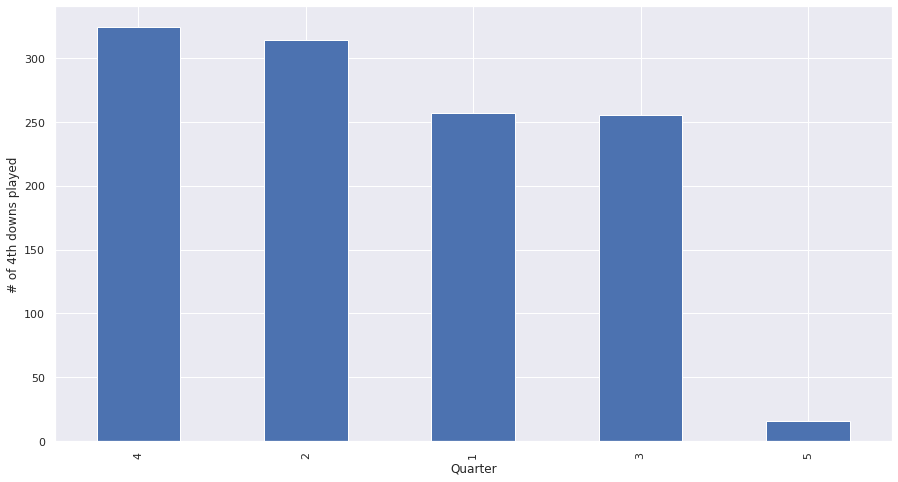

In [989]:
import matplotlib.pyplot as plt

#set size to a more readable region
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})

fig, ax = plt.subplots()
ax.set_ylabel("# of 4th downs played")
ax.set_xlabel("Quarter")
all_4th_downs['Quarter'].value_counts().plot(ax = ax, kind='bar')

So, plays occur about the same amount of times in the four quarters, with a slight uptick in the 4th and 2nd quarter. 

This makes sense when we understand the rules of football. The game goes into halftime after the second quarter, and finishes completely after the fourth. In both cases, teams will try to score any last minute points they can and prevent the other from doing the same by "burning off clock." In other words, they will call simple, short plays that take up time, and willingly go to 4th down to kick a field goal or score a touchdown.

Lastly, we can also see just how rare overtime is (represented as the 5th quarter.)

Let's try another frequency bar graph, but for the number of plays in the drive. How many plays do offenses typically run before reaching 4th down?

We'll use seaborn to keep the data in sorted order, and also for its colors. Seaborn is a fancier alternative to matplotlib, which we used above.

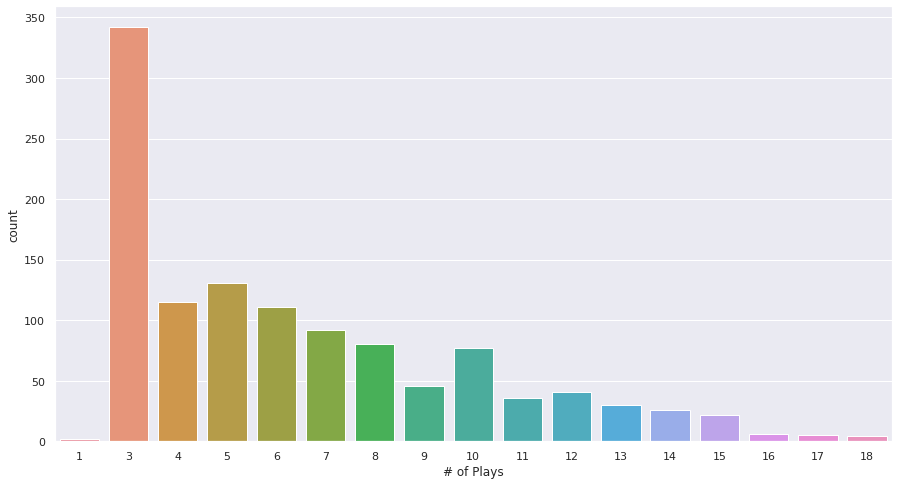

In [991]:
import seaborn as sns

#countplots count the number of occurences of each value.
ax = sns.countplot(x="# of Plays",data=all_4th_downs)

We can see that 4th downs are, by far, most common on the 4th play of the drive (when just 3 total plays have been run.) This means the offense gets the ball, fails to get 10 yards after 3 plays, and usually punts the ball right back to the other team.

This sad sequence of events is so common in football that it has a nickname: the "three and out".

As for the rest of the graph, we see that 4th downs occur with less frequency as time goes on. This is because drives typically don't last long in the NFL.

For our last component of EDA, let's find out which teams have come to the most 4th downs, and see what we can make of it! All teams played exactly 5 games in the data table we have, so this will be a fair comparison.

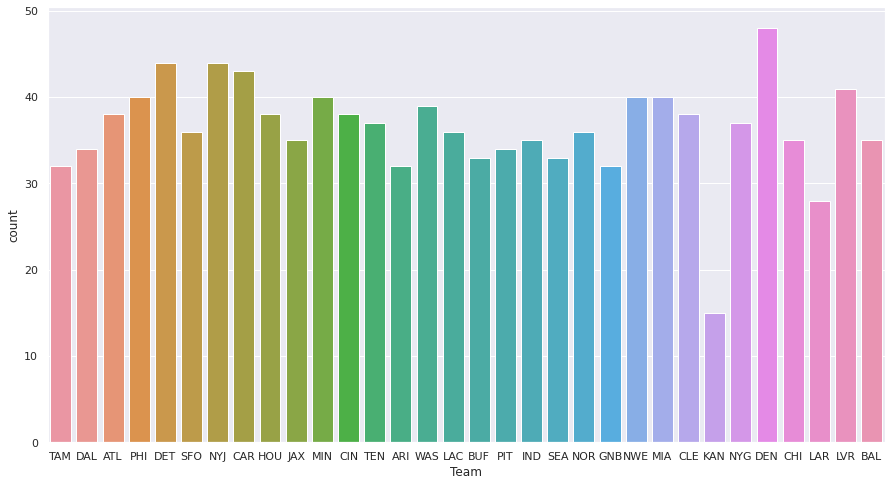

In [990]:
#increase figure size
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(x="Team",data=all_4th_downs)

The Denver Broncos (DEN) played the most 4th downs, and the Kansas City Chiefs (KAN) played by far the fewest. One possible explanation for this is that, in terms of offense, the two teams are on opposite ends of the spectrum. NFL fans know that the Chiefs are one of the highest-scoring offenses in the league, rarely being held to 4th down, while the Broncos are ultra-conservative and like winning games with their defense.

### Advanced Analysis

Our ultimate goal is to get a predictor for what a coach will do on a given 4th down, and for that we need to know what decisions were made on all the 4th downs we have so far.

We have a "result" column, but it tells us the result of the drive, not the play. For the play, we have to look through the "details" column, and this is where a rudimentary form of NL Processing comes in.

Here we simply look through the details column for key words that would tell us what the play is: "punt" would only appear in a punt play, and likewise for a field goal. Conversion attempts can be listed as many different things.

Note that even if the play goes wrong (punt is blocked, field goal misses, etc.) We only care about what the coach *intended* to happen.

Penalties are the hardest to classify because they can work with or against the offense, and they can even be accepted or declined by either team. Typically, when a penalty is accepted, the play doesn't count and the ball is moved up or down the field some amount of yards. So for now, we will give all accepted penalties a special category, and mostly ignore them in our analysis.

In [994]:
classification = []
pd.set_option('display.max_rows', 10)

#for each row in the 4th downs data table...
for i in range(0, len(all_4th_downs['Detail'])):
    details = all_4th_downs.at[i, 'Detail']
    words = details.lower()
    
    #attempt to classify the play based on its description
    if "punts" in words or "punt" in words:
        classification.append("Punt")
    
    elif "field goal" in words:
        classification.append("Field Goal")
        
    elif "penalty" in words and "accept" in words:
        classification.append("Penalty Play")
        
    else:
        classification.append("Conversion")

#add new column for the classifications we came up with
all_4th_downs['Decision'] = classification
all_4th_downs

,Quarter,Time,Down,ToGo,Detail,Total Time,Drive #,Team,Drive Result,# of Plays,To EndZone,Score,Game ID,Decision
0,1,13:26,4,2,Bradley Pinion punts 65 yards out of bounds,00:58:26,0,TAM,Punt,3,67,0,0,Punt
1,1,9:42,4,15,Bryan Anger punts 38 yards out of bounds,00:54:42,1,DAL,Punt,9,44,0,0,Punt
2,2,15:00,4,5,Bradley Pinion punts downed by Jaydon Mickens....,00:45:00,4,TAM,Punt,5,40,0,0,Punt
3,2,14:53,4,15,"Bradley Pinion punts 42 yards, returned by Ced...",00:44:53,4,TAM,Punt,5,50,0,0,Punt
4,2,12:59,4,3,"Penalty on DAL: Delay of Game, 5 yards (accept...",00:42:59,5,DAL,Punt,3,88,0,0,Penalty Play
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,2,4:34,4,5,"Rigoberto Sanchez punts 52 yards, returned by ...",00:34:34,7,IND,Punt,3,77,7,79,Punt
1162,2,1:39,4,4,Justin Tucker 23 yard field goal good,00:31:39,8,BAL,Field Goal,9,5,-4,79,Field Goal
1163,2,0:10,4,11,Carson Wentz pass complete short left to Micha...,00:30:10,9,IND,Field Goal,8,37,4,79,Conversion
1164,4,12:04,4,6,Rodrigo Blankenship 43 yard field goal good,00:12:04,14,IND,Field Goal,9,25,16,79,Field Goal


A simple question that we can easily answer is how often each decision is made on 4th down:

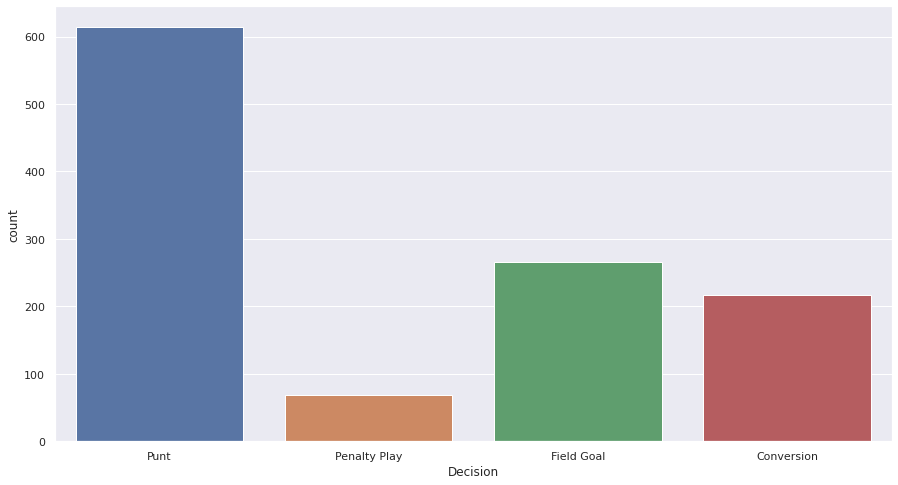

In [909]:
import seaborn as sns

ax = sns.countplot(x="Decision",data=all_4th_downs)

Punting is by far the most common, but why? What makes coaches so likely to give up? For that, it's time to get to the crux of the project! We will analyze all the factors that influence a coach's 4th down decision making.

### Advanced Analysis, Part 2

We start by considering your position on the field during the 4th down play. Credit to each of these websites for tools on graphing:
https://stackoverflow.com/questions/59204445/how-to-do-i-groupby-count-and-then-plot-a-bar-chart-in-pandas
https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib

In [910]:
yards_togo = all_4th_downs.groupby(["To EndZone", "Decision"]).size().unstack(level=1)
yards_togo = yards_togo.drop(["Penalty Play"], axis=1)

<AxesSubplot:title={'center':'4th Down Decisions by Location on Field'}, ylabel='To EndZone'>

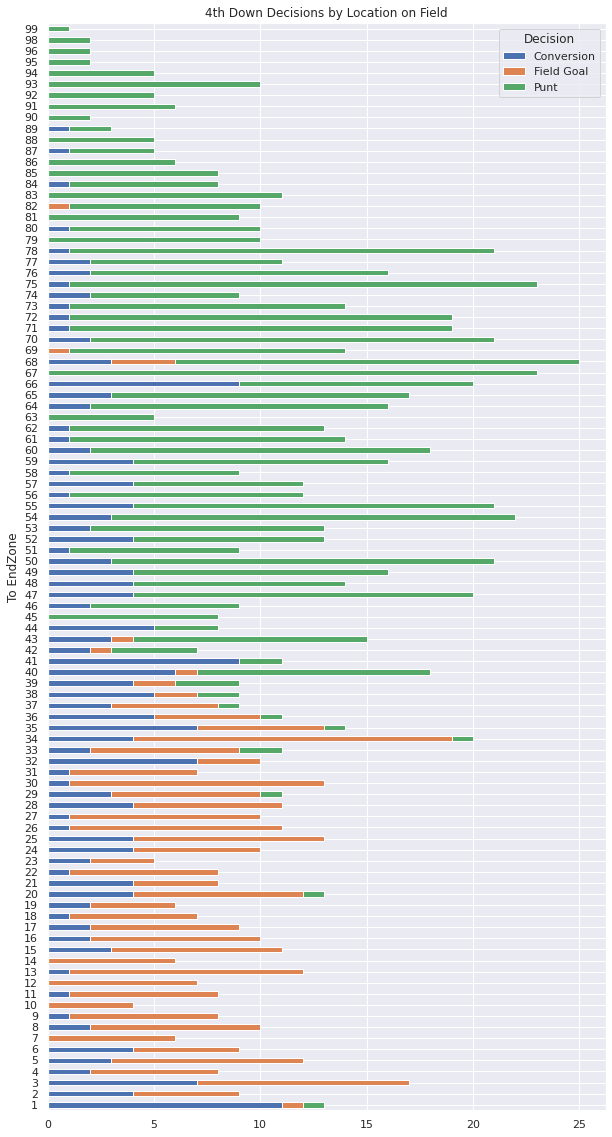

In [995]:
sns.set(rc = {'figure.figsize':(10,20)})
yards_togo.plot(
    kind = 'barh',
    stacked = True,
    title = '4th Down Decisions by Location on Field',
    mark_right = True)

*By now you may have noticed some errors exist in Pro Football Reference, for example, the 'punt' from the 1 yard line. In this link, see the play-by-play at 4 minutes in the 4th to see that a mislabelled game clock was the error that caused this: https://www.pro-football-reference.com/boxscores/202109190sea.htm*

*These errors are too complicated to root out in the limited scope of this project, so, we will just have to live with them and remind ourselves that no one would ever punt 1 yard from a touchdown.*

--

This chart is fascinating to people who love the strategy involved with football. Here are some big takeaways:

- Coaches almost exclusively punt on their own half of the field. We will explore why some coaches would go for it from this distance in the next section.
- Punts stop quickly past the 40 yard line. Field goals start becoming very common past about the 35. The region in the middle, 35-40 yards from the end zone, is a murky area where every option is on the table.
- Field goals are more common than conversion attempts at every position on the field, all the way up to the 1 yard line. There, coaches figure they are so close to glory that they may as well go for it all.

For the next section, let's consider the score. I would expect more punts for teams with the lead, field goals for close games, and conversion attempts for teams down big. Does this hold up?

<AxesSubplot:title={'center':'4th Down Decisions by Score'}, ylabel='Score'>

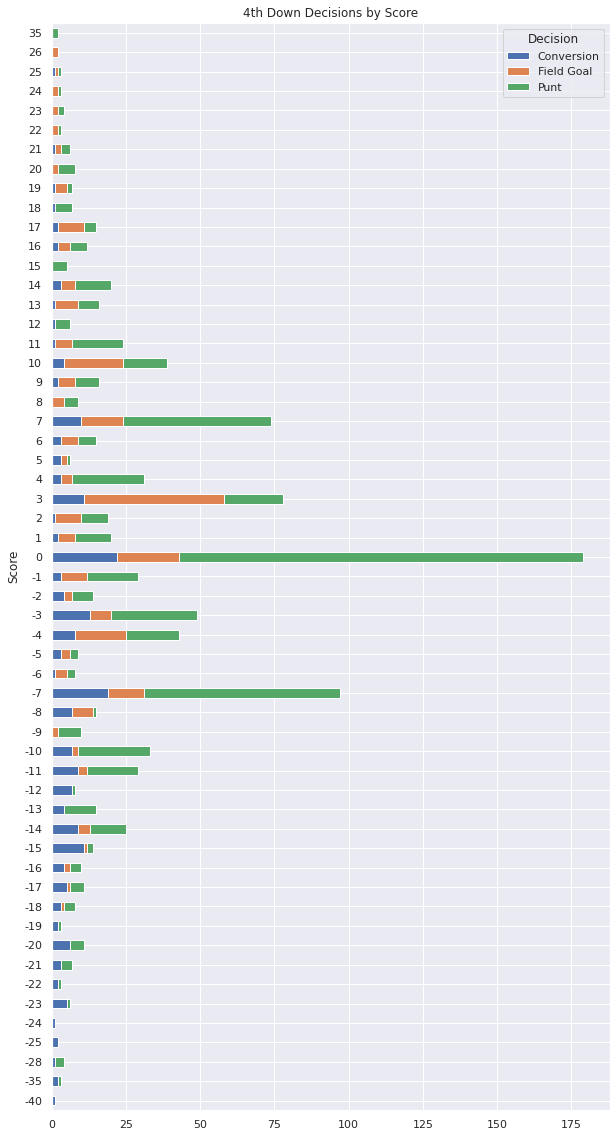

In [996]:
score_table = all_4th_downs.groupby(["Score", "Decision"]).size().unstack(level=1)
score_table = score_table.drop(["Penalty Play"], axis=1)

#same idea as before, stacked bar graph is a good representation
sns.set(rc = {'figure.figsize':(10,20)})
score_table.plot(
    kind = 'barh',
    stacked = True,
    title = '4th Down Decisions by Score',
    mark_right = True)

It's here that we can see some more trends emerge:
- Teams up by a lot will actually go for field goals more than anything else, most likely because they are dominating the opponent's defense and are having an easy time scoring. They don't have to risk going for conversions, so they take the free points.
- Teams in close games will typically punt to keep it close. Field goals happen often, but conversions are still very rare. No one wants to choke the game away on one bad play.
- Teams down by a lot will go for conversions in desperation. Funnily enough, they abandon field goals almost entirely, but not punting.

The last metric we want to measure is time on the clock. This alone will not make or break a coach's decision, rather, we hypothesize it works together with the other two. Consider if you were down by 14 points. In the 1st quarter, you might still punt, since there's plenty of time to get your team together. Late in the 4th, however, you'd have no choice but to go for it.

Note that we will consider quarters here and not full game time for the sake of simplicity.

We'll use the same technique we've been using to visualize decision-making.

<AxesSubplot:title={'center':'4th Down Decisions by Quarter'}, ylabel='Quarter'>

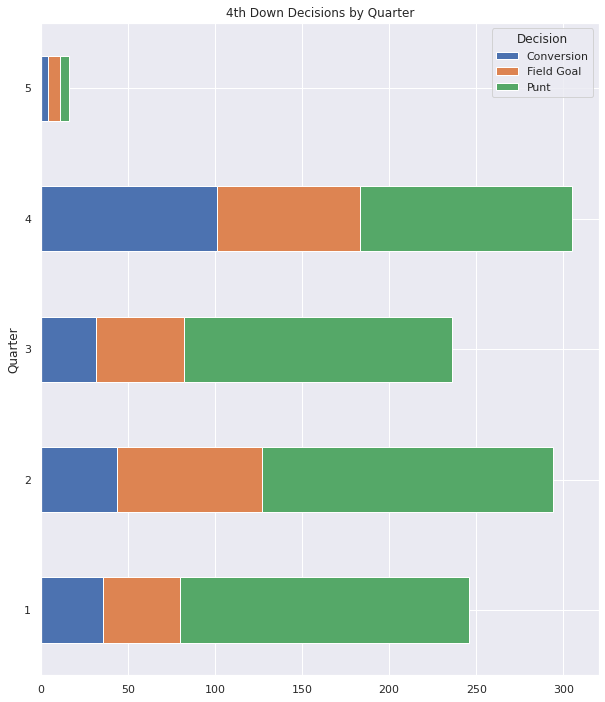

In [920]:
score_table = all_4th_downs.groupby(["Quarter", "Decision"]).size().unstack(level=1)
score_table = score_table.drop(["Penalty Play"], axis=1)

sns.set(rc = {'figure.figsize':(10,12)})
score_table.plot(
    kind = 'barh',
    stacked = True,
    title = '4th Down Decisions by Quarter',
    mark_right = True)

As expected, teams punt less and less as the game get closer to finish. Usually, it's because they don't have a choice.

### Predictions

With all the data we've gathered, can we make a 4th down decision given the inputs of: (1) position on the field, (2) score, and (3) time on the clock? For this task we'll use Python's machine learning tools: specifically, a decision tree.

A **decision tree** looks at multiple rows of data- in our case, 4th downs- and tries to figure out what factors would make a certain decision. It will split arbitrarily along attributes to accomplish this.

We're going to look only at the three attributes listed above, so we'll have to narrow down our table to just those attributes. If we wanted to, we could classify based on all of them, but these 3 seem the most important to me.

In [1004]:
#only keep the 3 attributes listed above.
brief_table = all_4th_downs.drop(["Down", "Time", "Detail", "Total Time", "Drive #", "Team", "Drive Result", \
                                 "# of Plays", "Game ID"], axis = 1)

#we only care about coaching decisions- ignore penalties
brief_table = brief_table[brief_table['Decision'] != 'Penalty Play']
brief_table = brief_table.reset_index(drop = True)

#the decisions column will be our "y" column, and this table, our "X".
decisions = brief_table['Decision']
brief_table = brief_table.drop(["Decision"], axis = 1)

#convert all columns to int fields
brief_table['Quarter'] = pd.to_numeric(brief_table['Quarter'])
brief_table['ToGo'] = pd.to_numeric(brief_table['ToGo'])
brief_table['To EndZone'] = pd.to_numeric(brief_table['To EndZone'])
brief_table['Score'] = pd.to_numeric(brief_table['Score'])

brief_table

,Quarter,ToGo,To EndZone,Score
0,1,2,67,0
1,1,15,44,0
2,2,5,40,0
3,2,15,50,0
4,2,8,93,0
...,...,...,...,...
1092,2,5,77,7
1093,2,4,5,-4
1094,2,11,37,4
1095,4,6,25,16


Now for the decision tree. For more info on Python Decision Trees, I found this tutorial helpful:
https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [1017]:
#!pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree

decider = tree.DecisionTreeClassifier()
#partition the data into training and testing components
X_train, X_test, y_train, y_test = train_test_split(brief_table, decisions, test_size = 0.25)
decider.fit(X_train, y_train)

X_test

,Quarter,ToGo,To EndZone,Score
376,4,7,52,-23
459,1,18,60,0
160,1,9,62,-3
438,3,9,44,-1
393,1,4,13,3
...,...,...,...,...
978,2,10,16,11
364,1,6,54,-7
817,1,2,52,0
794,3,15,77,0


Now let's use our decision tree to classify our test data.

In [1018]:
predictions = decider.predict(X_test)
X_test = X_test.reset_index(drop=True)
X_test['D.T. Reccomendation'] = predictions
X_test

,Quarter,ToGo,To EndZone,Score,D.T. Reccomendation
0,4,7,52,-23,Conversion
1,1,18,60,0,Punt
2,1,9,62,-3,Punt
3,3,9,44,-1,Punt
4,1,4,13,3,Field Goal
...,...,...,...,...,...
270,2,10,16,11,Field Goal
271,1,6,54,-7,Punt
272,1,2,52,0,Conversion
273,3,15,77,0,Punt


Note that resetting the index doesn't do any harm, since the order of rows is still the same as before.

For the last part of this project we should evaluate our decision tree and see how it did. Below is code to convert the table into a more readable form, so we can compare the actual decisions made on these downs to what our decision tree suggested- and maybe even our own suggestions.

In [1025]:
#this plots the decision tree so we can see the logic.
#tree.plot_tree(decider)

In [1020]:
evaluation_table = X_test.reset_index(drop=True)
evaluation_table['Actual Decision'] = y_test.reset_index(drop=True)
new_sticks = []
new_scores = []
for index, row in evaluation_table.iterrows():
    togo = evaluation_table.at[index, 'ToGo']
    points = evaluation_table.at[index, 'Score']
    new_sticks.append("4th & " + str(togo))
    if points > 0:
        new_scores.append("Up " + str(points))
    elif points < 0:
        new_scores.append("Down " + str(points*-1))
    else:
        new_scores.append("Tied")
evaluation_table['ToGo'] = new_sticks
evaluation_table['Score'] = new_scores
evaluation_table

,Quarter,ToGo,To EndZone,Score,D.T. Reccomendation,Actual Decision
0,4,4th & 7,52,Down 23,Conversion,Conversion
1,1,4th & 18,60,Tied,Punt,Punt
2,1,4th & 9,62,Down 3,Punt,Punt
3,3,4th & 9,44,Down 1,Punt,Punt
4,1,4th & 4,13,Up 3,Field Goal,Field Goal
...,...,...,...,...,...,...
270,2,4th & 10,16,Up 11,Field Goal,Field Goal
271,1,4th & 6,54,Down 7,Punt,Punt
272,1,4th & 2,52,Tied,Conversion,Punt
273,3,4th & 15,77,Tied,Punt,Punt


How did we do? The Decision Tree can change depending on the test data randomly chosen, but some things seem to be common:
- Going for points in the 4th quarter whenever possible
- Kicking field goals whenever you're reasonably close
- Punting in most other situations.

In [1030]:
count = 0
for index, _ in evaluation_table.iterrows():
    if evaluation_table.at[index, 'D.T. Reccomendation'] == evaluation_table.at[index, 'Actual Decision']:
        count = count + 1

print("Accuracy: " + str((count / len(evaluation_table) * 100)) + "%")

Accuracy: 80.0%


### Conclusion

In this project, we took a tour of the entire data science pipeline, and learned a bit about professional football too.

We started by **scraping** the website https://www.pro-football-reference.com/ for data on 2021 NFL games. It was by far the longest and most challenging part of the project, since we had to first understand what methods they were using to store their data. We recognized that each game is stored under its own URL in the ProFootballReference database, and we determined those URLs must be by scraping a separate page off of ProFootballReference that contained the 2021 NFL schedule.

From there, we **tidied** our data tables, which was also a difficult task. We wanted to know which team was on offense during each 4th down, so we had to match our table of 4th down plays to the table of drives for each game. From that we deduced what team was on offense, and also learned some other useful information, such as the length of the drive.

We combined both of these steps in scraping all the URLs (or at least, as many of them as my CPU could handle), and aggregating them into one gigantic database of 4th downs across the league this year.

Next, we performed **exploratory data analysis.** We wanted to answer some burning questions, such as: What teams face 4th down most and least often? When in drives do 4th downs usually happen? And, how often is each decision made in general?

From here we did our **advanced analysis**, and tried to observe some trends in 4th-down decision making. We created and tested hypotheses on how *positioning*, *score*, and *game clock* affected our decisions. We created stacked bar graphs to illustrate how frequently coaches punt, kick field goals, and go for it with each of these considerations individually taken into account.

Lastly, with the help of Python's sklearn we crafted a **decision tree** that could help us make the tough calls. We picked a decision tree because it was the best mechanism to predict a decision based on the attributes of position, score and time. Our decision tree performed fairly well, matching the coach's choice quite often.

I hope this tutorial/project hybrid has been insightful to you in learning about data and the NFL!

Go Birds!